# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


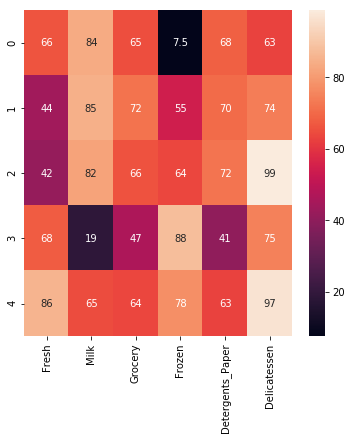

In [2]:
#comment applied-heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

# Display a description of the dataset
display(data.describe())

percentiles_data = 100*data.rank(pct=True)
#percentiles_samples = percentiles_data.iloc[[],[0,1,2,3,4,5]]
percentiles_samples = percentiles_data.iloc[0:5]
sns.heatmap(percentiles_samples, annot=True)

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [54,128,220]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,27329,1449,1947,2436,204,1333
1,140,8847,3823,142,1062,3
2,14755,899,1382,1765,56,749


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

Comparing with the average of samples the three stores give us the below impression:<br>

The <b> first </b>establishment stores quite higher stocks of Fresh like vegitables,fruits that clearly shows that the establishment is a <b> big retailer</b> who supply fresh item to the small retailers or Hotel .<br>

The <b>second </b> establishment also holds good quantity of Milk this gives us impression that this is a <b> Coffie house </b> where consuption of milk is atmost for tea,coffee and other dairy items .<br>

The <b>third </b>establishment has fearture same like first one whoes consutption on Fresh item is on higher side and rest of the feature items are below average , it also gives us impression of <b>big retail supplier </b>shop.<br> 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Detergents_Paper',axis = 1)
 

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
#commment applied - removed the random_state and tested on 20 iterations.
#X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size = 0.25, random_state = 51)
#X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size = 0.25)
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size = 0.25)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 51)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print ("Testing set prediction score :{}" .format(score))

#score on 20 iteration applied on each features :
#Grocery -Testing set prediction score :0.618863763506
#Frozen-Testing set prediction score :-0.229624647781
#Fresh- Testing set prediction score :-0.342631763453
#Milk - Testing set prediction score :0.36386098113
#Delicatessen- Testing set prediction score :-10.3387569669

C:\Users\neelu\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Testing set prediction score :0.455700166941


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

<br>The feature <b>'Detergents_Paper'</b> seems quite less enfluencive from the test data which make me to find its goodness of fit of a set of predictions to the actual values.<br>

<b>R^2 (cofficient of determination) </b>for feature <b> 'Detergents_Paper' </b>comes out to be <b>0.745</b> (no_fit < R^2 < perfect_fit).<br>

Random states can have a huge influence on the R^2-score obtained and can influence on the interpretation of the relevance of a feature ,to cope this I took 20 iterations inspite of setting any of the random states

 The results suggests that the other features correlates well with <b>'Detergents_Paper'</b> and that it is not necessary and does not provide a large amount of information gain, which implies that this feature selected can be ignored to identify the customer segments.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\neelu\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.00,0.10,-0.01,0.35,-0.10,0.24
Milk,0.10,1.00,0.73,0.12,0.66,0.41
Grocery,-0.01,0.73,1.00,-0.04,0.92,0.21
Frozen,0.35,0.12,-0.04,1.00,-0.13,0.39
Detergents_Paper,-0.10,0.66,0.92,-0.13,1.00,0.07
Delicatessen,0.24,0.41,0.21,0.39,0.07,1.00


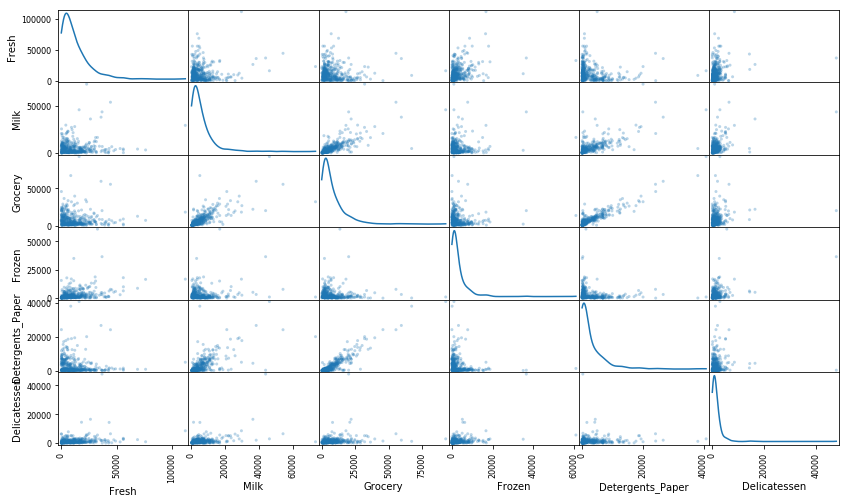

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

#2D matix to represent the correlation among available features
data.corr().round(decimals=2)


In [6]:
correlation = data.corr()
correlation

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### Question 3
    * Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
    * Are there any pairs of features which exhibit some degree of correlation? 
    * Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
    * How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
 
<br>Here we have a scatterplot in which different features are being plotted againt each each one.Lets pick one plot to analyse the pattern , Detergents_paper on x-axis vs Milk on y-axis , This plot suggest that Milk item tends to increase with increasing Detergents_paper.If the data have a bivaraite normal distribution , then the scatterplot should be approximately elliptical in shape.However , the points appear to fan out from the origin, suggesting that the data are not bivariate normal.<br>

The point in the top left appears to be an unusual observation or outlier.we donot have justifiable reason to remove this observation from the data set.<br>

Outliers often have greater influence on the results of data analyses than the remaining observations. For example, outliers have a strong influence on the calculation of the sample mean. If outliers are detected, and there is no collaborating evidence to suggest that they should be removed, then resistant statistical techniques should be applied which are not easily influenced by outliers. For example, the sample median is not sensitive to outliers, and so may be calculated in place of the sample mean.<br>

The correlation matrix shows the relation between the <b>Grocery and Detergents_paper</b> is <b>0.9246</b> which is highest compare to Grocery and Milk or Detergents_paper and Milk pairs.<br>
Milk-Grocery and Milk-Detergent Paper might slighlty correlated with each other.

Another less slightly correlated we can find from Fresh-Frozen (0.34) and Delicateseen-Frozen (0.39)

I would think the data points will lie on <b>two </b> features (<b>Grocery - Detergent Paper and Grocery - Milk</b>)

The distribution of data shows much closerness to 0 with respect to some of the higher data points, but since there are so few I think we could instead say that there are a high number of outliers also it appears that the relationship between the variables is approximately linear. 

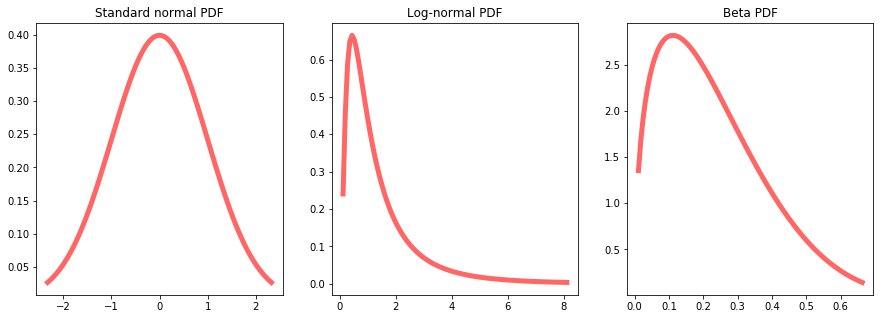

In [7]:
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import beta
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

def plot_norm(ax):
    ax.set_title("Standard normal PDF")
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
    ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6)

def plot_lognorm(ax, shape):
    ax.set_title("Log-normal PDF")
    x = np.linspace(lognorm.ppf(0.01, shape), lognorm.ppf(0.99, shape), 100)
    ax.plot(x, lognorm.pdf(x, shape), 'r-', lw=5, alpha=0.6)

def plot_beta(ax, a, b):
    ax.set_title("Beta PDF")
    x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
    ax.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6)

plot_norm(ax1)
plot_lognorm(ax2, 0.9)
plot_beta(ax3, 1.5, 5.0)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\neelu\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


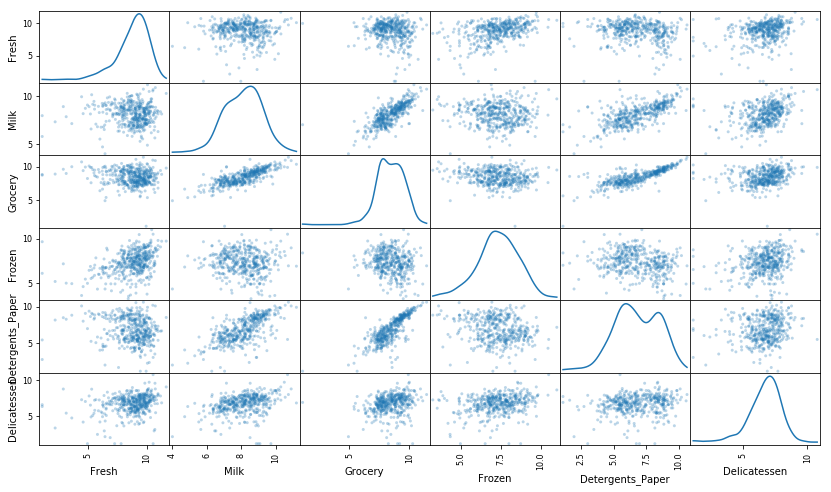

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.215704,7.278629,7.574045,7.798113,5.318120,7.195187
1,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
2,9.599337,6.801283,7.231287,7.475906,4.025352,6.618739


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
unique_outliers_index = dict()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    #outliers_df = display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers_df = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outliers_df)
    for counter in outliers_df.index:
        if counter not in unique_outliers_index.keys():
            unique_outliers_index[counter] = 1
        else:
            unique_outliers_index[counter] +=1

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65,66,75,128,154] #selected outliers having frequency more than one 



# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

print ("\n Outliers more than one feature: ")
df_more = log_data.loc[[counter[0] for counter in unique_outliers_index.items() if counter[1]>1]]
df_more['count'] = None
df_more['count'] = [unique_outliers_index[counter] for counter in df_more.index]
df_more


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372



 Outliers more than one feature: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,count
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612,2
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442,3
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523,2
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837,2
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437,2


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

From the table above it shows there are 5 data points considered outliers for more than one feature. These are [128,154, 65, 66, 75 ].Both the Gaussian Mixture and K-Mean are not practically strong enough and the result may be distorted by the outliers, to dig little more inside into the algo: 

GMM: If we apply the multivariate normal distributions to clusters ,it results in dropping off the PDF at the exponential rate (Based on <b>Tukey's </b>definition of an outlier applying <b>1.5</b> ,IQR  will push the outlier more far from the quartiles likely to form "outlier clusters" i.e clusters accomodate mostly for the outlier and may also contain some data points from the boundaries of real clusters.) which clearly indicates theat model is strongly affected by the outliers and clustering would be easier by removing the outlier which are not significant 


Considering the above facts they all can be removed from the datasetas as they are outside the expected range and skewing the analysis to cluster the data to split the customers into segments.<br>


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

             Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4430  0.1675 -0.4014  -0.4381  0.1782   
Dimension 2              0.7068 -0.5184 -0.5686  -0.5088 -0.3223   
Dimension 3              0.8299 -1.1958 -0.5284  -0.5283 -0.0073   
Dimension 4              0.9311 -1.4001 -0.5156  -0.4726  0.7781   
Dimension 5              0.9796 -1.4027  0.2036  -0.1172  0.7450   
Dimension 6              1.0000 -1.3735 -0.3366   0.7033  0.7655   

             Detergents_Paper  Delicatessen  
Dimension 1           -0.7514       -0.1499  
Dimension 2           -0.7938       -0.6440  
Dimension 3           -1.0055       -0.0154  
Dimension 4           -0.7959       -0.5577  
Dimension 5           -1.3541       -0.7669  
Dimension 6           -1.5365       -0.7472  


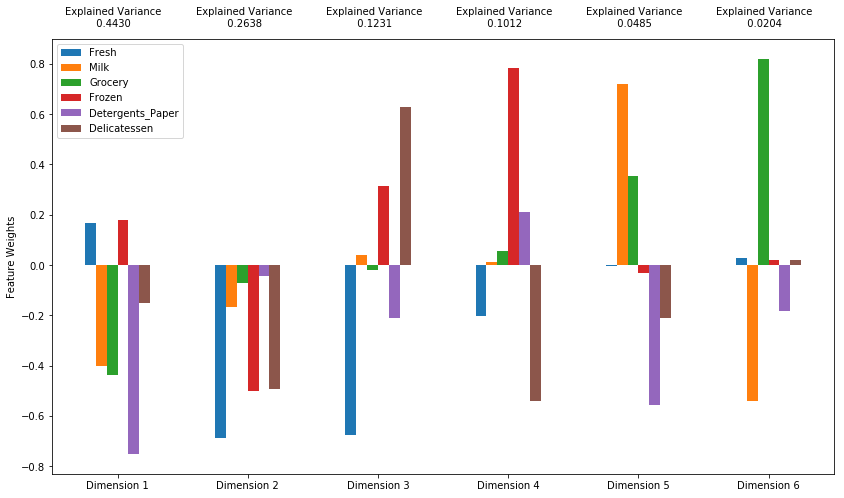

In [12]:
import numpy as np
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

#applied comment - use of cumulative sum
print np.cumsum(pca_results)


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**


In Total the first and second pricipal components account for <b>70.98% </b>of all variance in the data.
When the 3rd and 4th principal components (12.17% and 10.05% respectively) are included its now accounted for <b> 93.2% </b>.<br>

This celarly shows the <b>first dimension</b> is heavily reliant on Detergents,Grocery and Milk which are the 3 features identified as being most highly correlated.This dimension can be best categroized by customer spending on <b>'retail goods'</b>.<br>

The <b>Second dimension</b> appears to be orthogonal to the first, reducing the impact of Milk,Grocery and Detergents and instead significantly relying on variation in Fresh,Frozen and Delicatessen items in terms of spending , while also suggesting that increasing one might also lead to an incearse in the others.
Noted that the second dimension is best describing that customers who typically spend on <b>'foods'</b>.

The <b>third dimension</b> is mostly defined by the highly positive correlation to Fresh and a high negative correlation to Delicatessen such that an increase in one might lead to a decrease in the other, and <b>the fourth dimension</b> is similar to the third where it has polar opposites in correlation in Frozen and Delicatessen.<br>

<TABLE border="1">
<TR><TH>Dimensions<TH>Explained Variance<TH>Cumulative Variance
<TR><TD>Dimension-1<TD>0.4378<TD>0.4378
<TR><TD>Dimension-2<TD>0.2720<TD>0.7098
<TR><TD>Dimension-3<TD>0.1217<TD>0.8315
<TR><TD>Dimension-4<TD>0.1005<TD>0.9320
<TR><TD>Dimension-5<TD>0.0479<TD>0.9799
<TR><TD>Dimension-6<TD>0.0201<TD>1.0
</TABLE>

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.0941,-1.2108,-0.2209,-0.5664,-0.2238,0.0638
1,-0.6435,6.4218,-1.6655,1.9916,1.7796,-0.9933
2,3.3331,-0.1830,-0.0061,-0.6771,0.1655,0.2403


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [14]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.0941,-1.2108
1,-0.6435,6.4218
2,3.3331,-0.1830


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

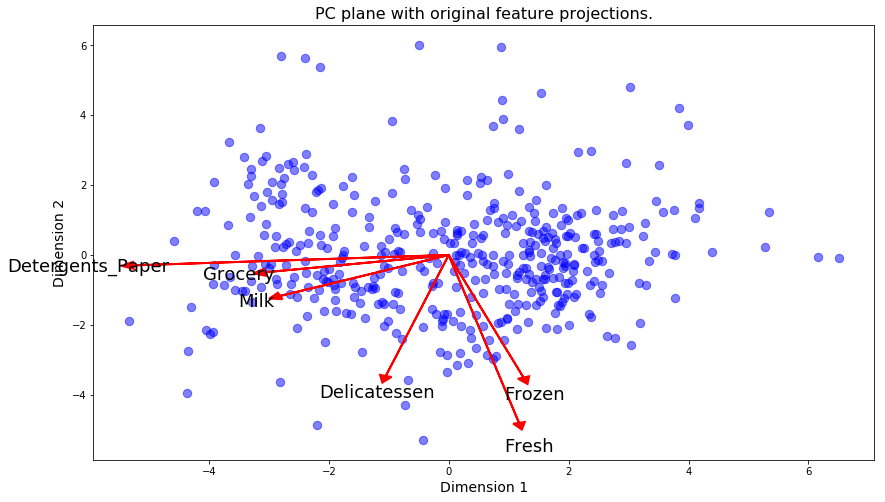

In [16]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**


<b>K-Mean-</b><br>
•	Simple,Fast,Scalable.<br>
•	K specifies number of clusters in the dataset (K). It is based on initializing the K clusters based on a center point for each of the clusters.<br> 
•	The cluster center  naturally migrate to the center of its members given in the dataset over multiple iterations as the cluster are recentered based on its point memberships.<br>
•	The output for any fixed training set will not always give  the same clustering results as it is dependent on the start of the cluster centers.<br>
•	Hard assignment because any two center points that are close together will fight over the ownership of their points, since points in a K-Means cluster cannot be shared.<br>
•	Preset K value is required, it could be difficult to predict which K is best.<br>
•	K-means algorithm only clusters datapoints in spherical shapes<br>

 
<b>GMM </b><br>
•	More flexible<br>
•	Soft assignment of points  to the clusters by allowing for mixed membership of points in more than one cluster by using probability surfaces for a point to belong to a mixture of clusters, assuming elliptical shapes in the data distributions in the cluster<br>
•	Works well with different distribution of data but could fail is the dimensionality of the problem is too high.<br>
•	 It needs a sufficiently many data points in the dataset per cluster to converge and find a solution (probabilities of points belonging to clusters); <br>
•	For less data points  it will diverge and find solutions with infinite likelihood unless it is constraint in someway. So, if a low sample dataset it may be slow to converge to the given number of cluster, or not converge at all, due to low probabilities of the given number of clusters assigned.<br>
• Can fit more complex cluster shapes since each mixture component can freely fit its covariance matrix.<br>

<b>Conclusion</b><br>
By looking at our 2 dimensional biplot above and data points we have in our data set,it can be inference that there are sufficient data points and hence a density cluster using probability is a better method to create our clusters than K-Means.
If our dataset was considerably larger, we could have consider K-means furthermore GMM clustering allows for a single datapoint to be in multiple clusters. This could be useful in our case since it allows a certain customer to subscribe to more than just one identity in our clusters.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
for n_components in range(2,11):
# TODO: Apply your clustering algorithm of choice to the reduced data 
  clusterer = GaussianMixture(n_components=n_components, random_state=42).fit(reduced_data)
    
# TODO: Predict the cluster for each data point
  preds = clusterer.predict(reduced_data)


# TODO: Find the cluster centers
  centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
  sample_preds = clusterer.predict(pca_samples) 
    
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
  score = silhouette_score(reduced_data, preds)
  print "score for {} clusters is {}".format(n_components, score)

#applied comments- reinitilize the n_components to the optimal value 2
clusterer = GaussianMixture(n_components=2, covariance_type='full', random_state=42).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

score for 2 clusters is 0.421916846463
score for 3 clusters is 0.404248738241
score for 4 clusters is 0.293269564847
score for 5 clusters is 0.300456388725
score for 6 clusters is 0.326139450471
score for 7 clusters is 0.324227205384
score for 8 clusters is 0.296476656397
score for 9 clusters is 0.307187479579
score for 10 clusters is 0.310351081779


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

Silhouette score for 2 clusters is 0.419844196683
Silhouette score for 3 clusters is 0.406517305845
Silhouette score for 4 clusters is 0.266729856428
Silhouette score for 5 clusters is 0.314933893813
Silhouette score for 6 clusters is 0.309913219648
Silhouette score for 7 clusters is 0.330568334745
Silhouette score for 8 clusters is 0.316808991822
Silhouette score for 9 clusters is 0.314514339367
Silhouette score for 10 clusters is 0.319207086893


-1 >= s(i) <= 1 ,looking above scores it clearly shows the best s(i) when <b>i = 2</b> (only 2 clusters).

As we increase the number of clusters, the Silhouette score gets closer to 0 which indicate overlapping clusters. Where as when using 2 clusters, we get score values closer to 1 indicating dense and well seperated clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

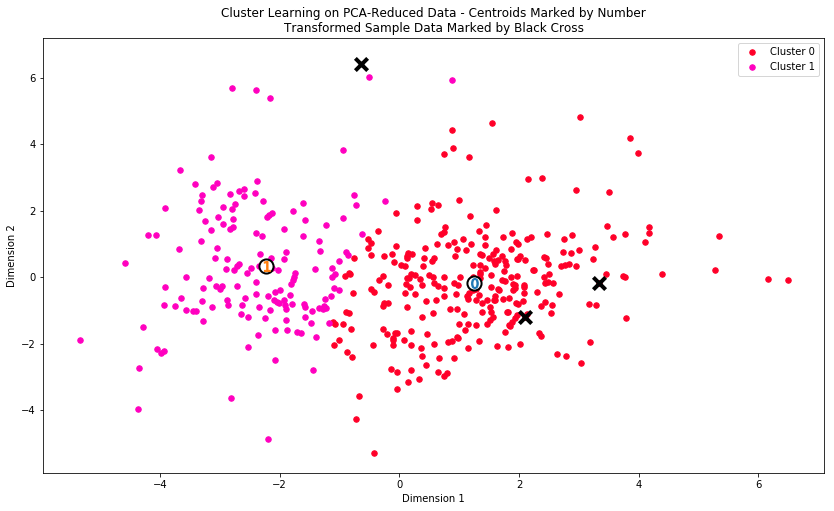

In [18]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [19]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])
true_centers.index = segments
display(true_centers)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
Comparing the samples with the mean table below:


<TABLE border="2" > 
 <tr><th><B>MEAN</B></th></tr>
 <tr>
 <td>FRESH</td><td>1200.2</td>
 </tr>
 <tr>
 <td>MILK</td><td>5796.2</td>
 </tr>
  <tr>
 <td>GROCERY</td><td>7951.3</td>
 </tr>
  <tr>
 <td>DETERGENT_PAPER</td><td>2881.4</td>
 </tr>
  <tr>
 <td>DELICATESSEN</td><td>1524.8</td>
 </tr>
</TABLE>

The inferences for differnt segments can be concluded as below:

<b>Segment 0</b> - Shows the high in Fresh item rest of the features are average which gives an impression that the establishment could be Supplier - Predominantly fresh food,This suggests a <b>retailer or a mass producer or a market </b> for fresh food.<br>

<b>Segment 1</b>- It is high in Fresh,Milk, Grocery and Detergent, the establishment could be a <b>Hotel/Restaurant/cafe </b>where the consumption of fresh items and milk based production consuption is high also looking at the  detergent also indicates the establishment might be some hotel/restaurants where cleaing the discs and utensils are required.<br>



### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [20]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

('Sample point', 0, 'predicted to be in Cluster', 0)
('Sample point', 1, 'predicted to be in Cluster', 1)
('Sample point', 2, 'predicted to be in Cluster', 0)


**Answer:**


Index 54 (0)
Initial assessment was that the establishment could be big retailers/supplier of the fresh items.
The model predict it as a Big distributor/supplier of fresh items , this matches what the initial prediction was

Index128 (1)
Initial assessment was it to be a cafe where consuption of milk items is on higher side.
The model predict the feature having more weightage is Fresh and the establishment could be the Retail/mass producer of fresh item, this doesn't matches what our intial assessment said.

Index220 (2)
Initial assessment was it has higher weightage for Fresh item and the establishment can be catagorized as mass producer/supplier of fresh item.
The model prediction to be a Fresh on hihger side atmost.
This does seem to agree with the original prediction. 

This could suggest the model did a not done a good job of characteristing the data. However, I would argue it is just a different - and perhaps more logical - interpretation of the data. The model seems to take the opinion that a customer with a variety of prominent features - Fresh, Milk, Grocery, Frozen etc suggests that it is Cluster  (Supermarket or Retailer of some sort) similarly the prominent feature like Milk might be a Cafe/restaurant , Customers with a particular focus on a single feature - Fresh - are regarded as Cluster 0(Retailer/supplier). This actually seems like a valid interpretation that I could have originally made.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Taking stratigic decisions for business are must to keep the revenue at positive side, applying 3-day per week schedule to segment 0 customers (supermarkets) having good stocks of fresh food items , milk which are perisable items and require big investment to keep fresh bettter to deliver on same day itself, tough this segment has good stocks of other features like grocery , detergents etc which can wait for alternate day supply but decisioning to change the delivery for all the feature items is not good for Segment 0 customers.

For Segment 0 which our model says to be a mass producers/supplier of fresh items like fruits,vegetables etc wich also require storage facilities to keep fresh if there is no delivery on same day, 3 - day delivery for such customers also doesn't seems a good decision.
For Segment 1 too its not a promisible decision as they (hotel/restaurants/cafe) where consuption of Milk and the products from Milk are more prominent , Milk is a perishable item and keeping for more than a day is not economical from business point of view  changing from 5 to 3 days a week will impact their business.

We could apply the new 3 day schedule to just the sample for each cluster, and measure how their reported service satsifaction changes with respect to their control groups. This would give us data on how the schedule change affects customers in these 2 seperate categories, which will reveal if the schedule is more helpful/damaging to one group or the other

To summerize above We could conduct useful A/B testing of each groups by selecting a small but statistically significant sample of customers from each cluster and using the remainder of their cluster as the control group. Iterating the segmentation might help to model the business startegy, logistics and marketing.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We can use semi-supervised techniques (https://en.wikipedia.org/wiki/Semi-supervised_learning) to classify new customers:

By first running an unsupervised clustering approach, such as GMM to establish clusters then use these clusters as a new feature - 'Customer Segment' abritrary assigned enumerated values e.g. 0 , 1, 2 etc.

We'd then create new data points for each new customer, with all of their spending estimates.

We can do classification supervised learning (Decision Tree). For instance, we already have the customer segment and we can extend the analysis by looking at the happy/ unhappy customer. This can be performed after we get the result from A/B Testing. Or we can do Support Vector Machine (which does very well to seperate classified clusters) with a target variable of 'Customer Segment'
Standard Supervised Learning optimizations could be used to tune the model - boosting, cross-validation etc

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

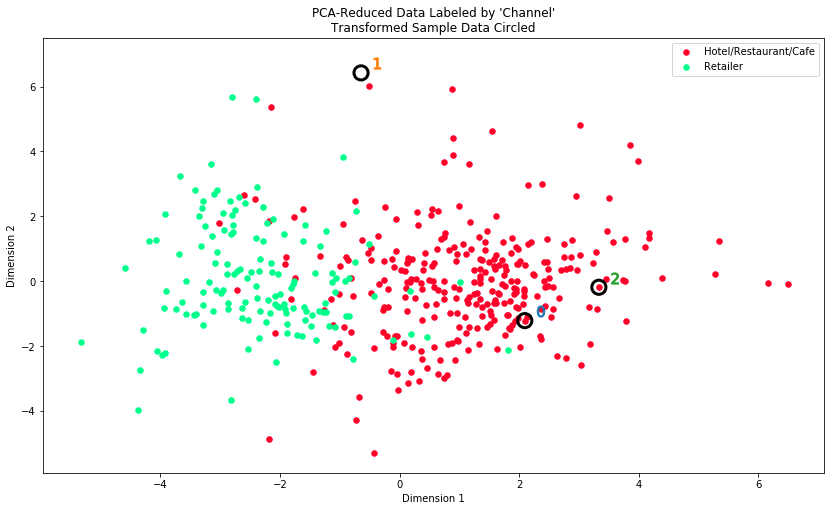

In [21]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

The number of clusters matches the number of channels, so it seems like that's quite relevent and maatches well. although there is some bleed over between the 2 groups in the middle of the distribution, segment 0 in the analysis is clearly "Retail", and segment 1 is clearly "Hotel/Restaurants/Cafes".
The previous definition of the customer segments Cluster 0 as Retail/Mass producer and Cluster 1 as Restaurant/Cafes, are not in full agreement with the above classification.

In the above classification not a single point fall under Retail cluster and almost all of them are into Hotel/cafe cluster , from my previous classification only one matches correctly there could be some degree of overlapping between the components ,I believe the algorithm did a reasonable job of clustering these customers according to broad categories of business type.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.